(261,)


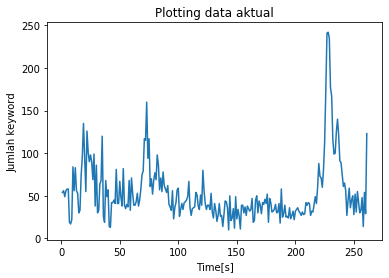

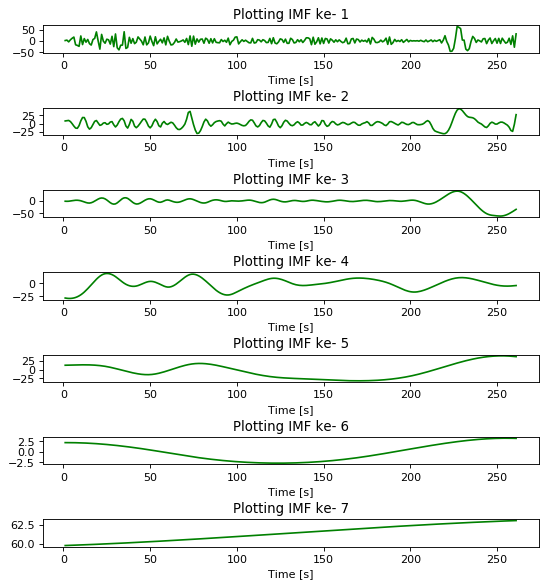

In [137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PyEMD import EMD

# loading data
r = pd.read_excel('data.xlsx')
r = r.reset_index().values
data = r[:, 5]
data = np.array(data)
data = data.astype(float).reshape(data.size)
print(data.shape)
# melakukan EMD
em = EMD()
t = np.arange(1,262)
em.emd(data, t)
imfs, res = em.get_imfs_and_residue()
N = imfs.shape[0]+1

plt.plot(t,data)
plt.title('Plotting data aktual')
plt.xlabel('Time[s]')
plt.ylabel('Jumlah keyword')
plt.show()


from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
# plot data IMF (ada 7)
for n, imf in enumerate(imfs):
    plt.subplot(N,1,n+2)
    plt.subplots_adjust(hspace = 2,wspace=1)
    plt.plot(t, imf, 'g')
    plt.title("Plotting IMF ke- "+str(n+1), fontsize=12)
    plt.xlabel("Time [s]", fontsize=10)
plt.savefig('hasil plot IMF')
plt.show()

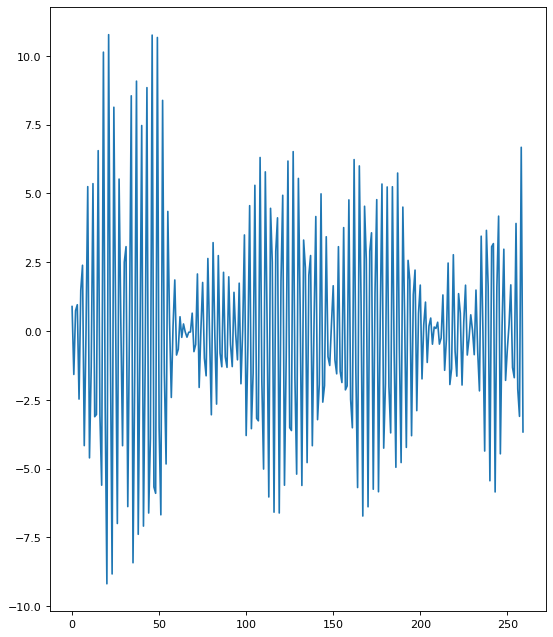

In [138]:
from vmdpy import VMD
alpha = 2000       # moderate bandwidth constraint  
tau = 0.            # noise-tolerance (no strict fidelity enforcement)  
K = 3              # 3 modes  
DC = 0             # no DC part imposed  
init = 1           # initialize omegas uniformly  
tol = 1e-7  

#. Run actual VMD code  
u, u_hat, omega = VMD(imfs[0], alpha, tau, K, DC, init, tol)  
t = np.arange(0,260)
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, u[2])

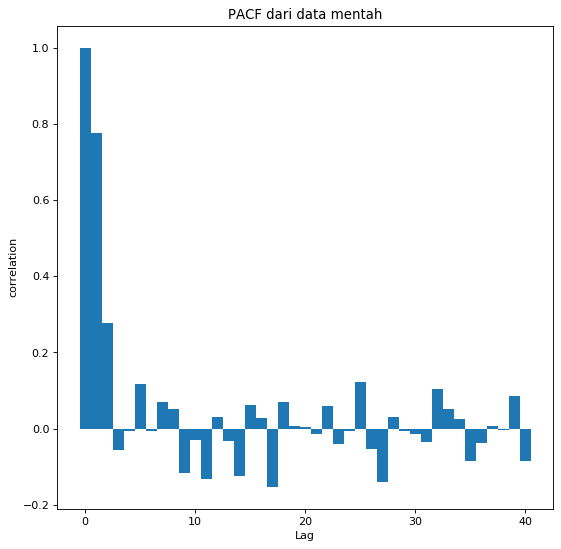

<Figure size 432x288 with 0 Axes>

In [139]:
from statsmodels.tsa.stattools import pacf
pc = pacf(data)
lag = np.arange(0,41)
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(lag, pc, 1)
plt.title('PACF dari data mentah')
plt.xlabel('Lag')
plt.ylabel('correlation')
plt.show()
plt.savefig('hasil plot PACF')

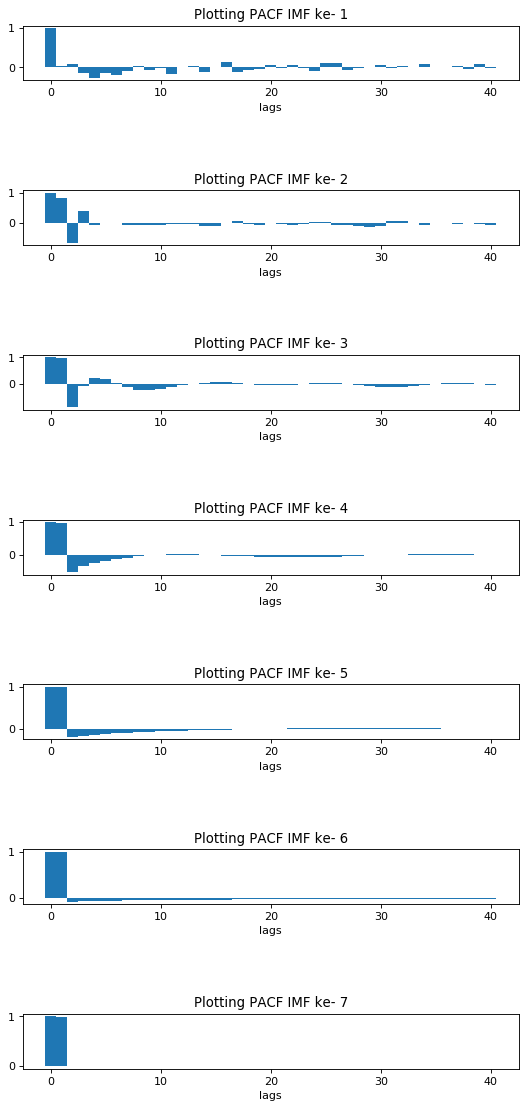

In [140]:
figure(num=None, figsize=(8, 20), dpi=80, facecolor='w', edgecolor='k')
for n, imf in enumerate(imfs):
    plt.subplot(N,1,n+2)
    plt.subplots_adjust(hspace = 2,wspace=1)
    plt.bar(lag, pacf(imf), 1)
    plt.title("Plotting PACF IMF ke- "+str(n+1), fontsize=12)
    plt.xlabel("lags", fontsize=10)

/home/christophersalim_/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


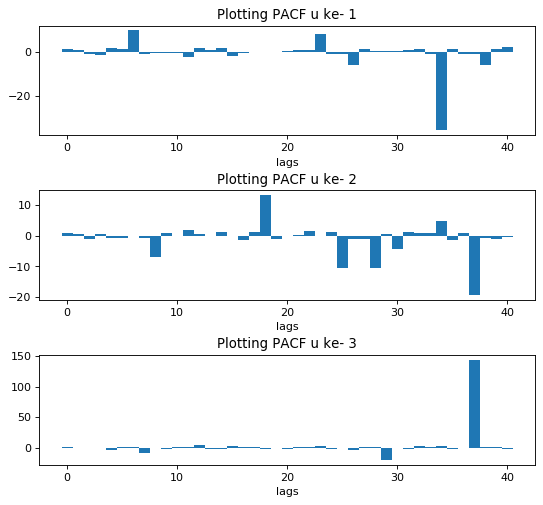

In [141]:
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
for n, uu in enumerate(u):
    plt.subplot(4,1,n+2)
    plt.subplots_adjust(hspace = 0.5,wspace=1)
    plt.bar(lag, pacf(uu), 1)
    plt.title("Plotting PACF u ke- "+str(n+1), fontsize=12)
    plt.xlabel("lags", fontsize=10)

In [167]:
from sklearn.neural_network import MLPRegressor 
mlp = MLPRegressor(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000,), learning_rate='constant',
             learning_rate_init=0.5, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
data_train = data[0:220]
data_test = data[220:261]
t = np.arange(0,220)
t = t.reshape(-1,1)
mlp.fit(t, data_train)

MLPRegressor(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000,), learning_rate='constant',
             learning_rate_init=0.5, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [168]:
t_train = t
t_test = np.arange(220,265).reshape(-1,1)
predict_train = mlp.predict(t_train)
predict_test = mlp.predict(t_test)
print(predict_test.shape)

(45,)


In [169]:
def err(y_cal, y_true):
    error = y_cal - y_true
    return error

def square_error(error):
    sq_err = error ** 2
    return sq_err

def mse(y_cal, y_true):
    error = err(y_cal, y_true)
    sq_err = square_error(error)
    mse = np.mean(sq_err)
    return mse

def mad(y_cal, y_true):
    error = err(y_cal, y_true)
    ad = np.abs(error)
    mad = np.mean(ad) 
    return mad
def mape(y_cal,y_true):
    error = err(y_cal, y_true)
    ad = np.abs(error)
    ape = ad*100/y_true
    mape = np.mean(ape)
    return mape

mse_train = mse(predict_train, data_train)
mse_test_forecast = mse(predict_test[0:41], data_test)
print('MSE for train data is = ' + str(mse_train) + ' while MSE for test and forecast is= ' + str(mse_test_forecast))

mad_train = mad(predict_train, data_train)
mad_test_forecast = mad(predict_test[0:41], data_test)
print('MAD for train data is = ' + str(mad_train) + ' while MAD for test and forecast is= ' + str(mad_test_forecast))

mape_train = mape(predict_train, data_train)
mape_test_forecast = mape(predict_test[0:41], data_test)
print('MAPE for train data is = ' + str(mape_train) + ' while MAPE for test and forecast is= ' + str(mape_test_forecast))


MSE for train data is = 535.2395507970765 while MSE for test and forecast is= 9406.178952449398
MAD for train data is = 16.977461986437426 while MAD for test and forecast is= 78.03940265033157
MAPE for train data is = 40.35846343679661 while MAPE for test and forecast is= 86.14609630461246


(261,)


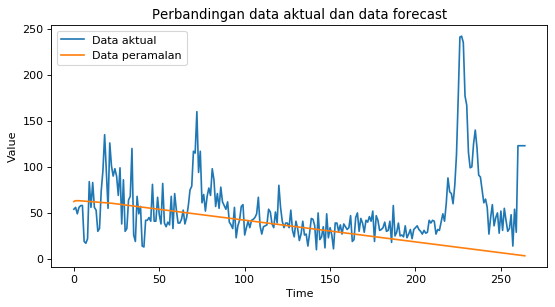

In [170]:
combine_to_data = np.ones(4,) * data[260]
data_new = np.concatenate((data, combine_to_data), axis=0)
t_plot = np.arange(0,265)
predict = np.concatenate((predict_train, predict_test), axis=0)
print(data.shape)
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t_plot, data_new, label='Data aktual')
plt.plot(t_plot, predict, label='Data peramalan')
plt.title('Perbandingan data aktual dan data forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper left')
